<a href="https://colab.research.google.com/github/lauracantik/dataminingg/blob/main/TugasPertemuan9_DML_Kelompok6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url="https://raw.githubusercontent.com/project303/dataset/master/data-province-2015.cvs"
df = pd.read_csv(url, sep='\t')

In [2]:
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

In [3]:
df.rainfall.count()

34

In [4]:
df['rainfall'].count()

34

In [5]:
df.sum()

province                AcehSumatera UtaraSumatera BaratRiauJambiSumat...
rainfall                                                          63615.1
rainy_day                                                            4909
expenses_food_urban                                              16189922
expenses_other_urban                                             20277168
expenses_food_rural     3951364130874479444727564128713583914037233591...
expense_other_rural     2601832694073191434139293493292609233266562947...
unemployment                                                       203.32
time_zone                                                              54
island                  SumateraSumateraSumateraSumateraSumateraSumate...
dtype: object

In [6]:
print('Total rainfall \t\t:', df.rainfall.sum())
print('Minimum rainfall value \t:', df.rainfall.min())
print('Maximum rainfall value \t:', df.rainfall.max())
print('Average rainfall value \t:', df.rainfall.mean())

Total rainfall 		: 63615.1
Minimum rainfall value 	: 460.9
Maximum rainfall value 	: 3548.0
Average rainfall value 	: 1871.0323529411764


In [7]:
df.groupby('time_zone').count()

,province,rainfall,rainy_day,expenses_food_urban,expenses_other_urban,expenses_food_rural,expense_other_rural,unemployment,island
time_zone,,,,,,,,,
1,18,18,18,18,18,18,18,18,18
2,12,12,12,12,12,12,12,12,12
3,4,4,4,4,4,4,4,4,4


In [8]:
df.groupby("time_zone")["province"].count()

time_zone
1    18
2    12
3     4
Name: province, dtype: int64

In [9]:
df.groupby('time_zone').first()

,province,rainfall,rainy_day,expenses_food_urban,expenses_other_urban,expenses_food_rural,expense_other_rural,unemployment,island
time_zone,,,,,,,,,
1,Aceh,1575.0,146,466355,529945,395136,260183,9.93,Sumatera
2,Bali,1133.8,124,441921,737657,389091,441381,1.99,Bali
3,Maluku,1987.2,167,486374,511825,378946,285648,9.93,Maluku


In [10]:
df.groupby('time_zone')[['rainfall']].mean()

,rainfall
time_zone,
1,2041.544444
2,1654.683333
3,1752.775000


In [11]:
df.groupby('time_zone').agg(avg_rainfall=('rainfall', 'mean'))

,avg_rainfall
time_zone,
1,2041.544444
2,1654.683333
3,1752.775000


In [13]:
df.groupby('time_zone').agg(
 avg_rainfall=('rainfall', 'mean'),
 max_rainfall=('rainfall', 'max'),
 min_rainfall=('rainfall', 'min'))


,avg_rainfall,max_rainfall,min_rainfall
time_zone,,,
1,2041.544444,3548.0,975.9
2,1654.683333,3382.0,460.9
3,1752.775000,2844.6,913.4


In [14]:
df.groupby('time_zone').agg(
 avg_rainfall=('rainfall', 'mean'),
 min_rainy_day=('rainy_day', 'min'),
 max_rainy_day=('rainy_day', 'max'))

,avg_rainfall,min_rainy_day,max_rainy_day
time_zone,,,
1,2041.544444,105,215
2,1654.683333,68,202
3,1752.775000,127,218


In [15]:
df.groupby('time_zone', as_index=False).agg(
 avg_rainfall=('rainfall', 'mean'),
 min_rainy_day=('rainy_day', 'min'),
 max_rainy_day=('rainy_day', 'max'))

,time_zone,avg_rainfall,min_rainy_day,max_rainy_day
0,1,2041.544444,105,215
1,2,1654.683333,68,202
2,3,1752.775000,127,218


In [16]:
df['expenses_urban'] = df['expenses_food_urban'] + df['expenses_other_urban']
df[['province', 'island', 'expenses_urban', 'expenses_food_urban',
'expenses_other_urban']].head()

,province,island,expenses_urban,expenses_food_urban,expenses_other_urban
0,Aceh,Sumatera,996300,466355,529945
1,Sumatera Utara,Sumatera,869682,416073,453609
2,Sumatera Barat,Sumatera,1088499,509609,578890
3,Riau,Sumatera,1192509,530836,661673
4,Jambi,Sumatera,1020731,464204,556527


In [17]:
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
expenses_urban          34
dtype: int64

In [18]:
df = df.drop(columns=['expenses_urban'])
df.count()

province                34
rainfall                34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

In [19]:
df.rename(
 columns={"province": "propinsi", "rainfall": "curah_hujan"},
  inplace = True)
df.count()


propinsi                34
curah_hujan             34
rainy_day               34
expenses_food_urban     34
expenses_other_urban    34
expenses_food_rural     34
expense_other_rural     34
unemployment            34
time_zone               34
island                  34
dtype: int64

In [20]:
time_zone_data = {
 'time_zone': [1, 2, 3],
 'name_zone': ['WIB', 'WITA', 'WIT']}
time_zone_df = pd.DataFrame(time_zone_data, columns = ['time_zone', 'name_zone'])
time_zone_df

,time_zone,name_zone
0,1,WIB
1,2,WITA
2,3,WIT


In [21]:
result_df = pd.merge(df, time_zone_df, on='time_zone', how='left')
result_df[['propinsi', 'curah_hujan', 'time_zone', 'name_zone']].head()

,propinsi,curah_hujan,time_zone,name_zone
0,Aceh,1575.0,1,WIB
1,Sumatera Utara,975.9,1,WIB
2,Sumatera Barat,3548.0,1,WIB
3,Riau,2048.3,1,WIB
4,Jambi,1694.9,1,WIB


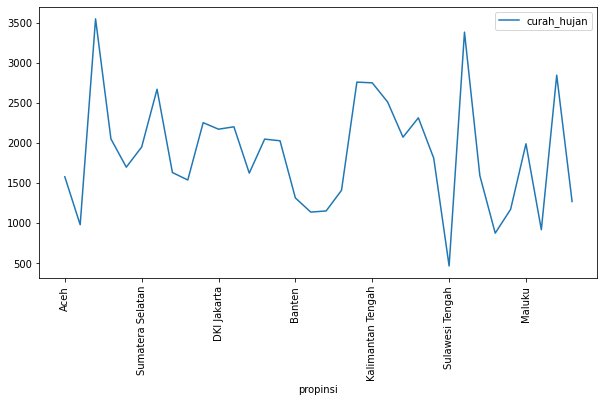

In [22]:
%matplotlib inline
result_df.plot(x="propinsi", y="curah_hujan", rot=90, figsize=(10,5))

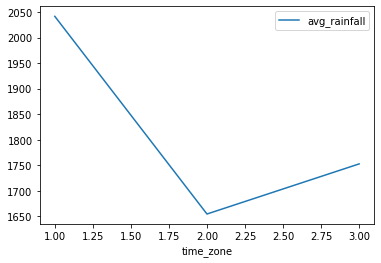

In [23]:
result_df.groupby(['time_zone', 'name_zone'],
as_index=False).agg(avg_rainfall=('curah_hujan', 'mean'))\
 .plot(x="time_zone", y="avg_rainfall")

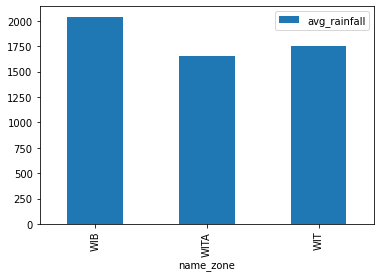

In [24]:
result_df.groupby(['time_zone', 'name_zone'],
as_index=False).agg(avg_rainfall=('curah_hujan', 'mean'))\
 .plot(x="name_zone", y="avg_rainfall", kind="bar")